In [1]:
import pandas as pd
import arff
from scipy.stats import gaussian_kde
from scipy.stats.distributions import uniform
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from arff2pandas import a2p

init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
with open('meta-features.arff') as f:
    df = a2p.load(f)
    #print(ds)

In [3]:
df.head()

,task_id@NUMERIC,AutoCorrelation@NUMERIC,Dimensionality@NUMERIC,MajorityClassPercentage@NUMERIC,MajorityClassSize@NUMERIC,MinorityClassPercentage@NUMERIC,MinorityClassSize@NUMERIC,NumberOfBinaryFeatures@NUMERIC,NumberOfClasses@NUMERIC,NumberOfFeatures@NUMERIC,NumberOfInstances@NUMERIC,NumberOfInstancesWithMissingValues@NUMERIC,NumberOfMissingValues@NUMERIC,NumberOfNumericFeatures@NUMERIC,NumberOfSymbolicFeatures@NUMERIC,PercentageOfBinaryFeatures@NUMERIC,PercentageOfInstancesWithMissingValues@NUMERIC,PercentageOfMissingValues@NUMERIC,PercentageOfNumericFeatures@NUMERIC,PercentageOfSymbolicFeatures@NUMERIC
0,3.0,0.999114,0.005043,0.547202,0.031904,0.954720,0.032910,1.0,0.000000,0.018613,0.027637,0.0,0.0,0.000000,0.15,1.0,0.0,0.0,0.000000,1.000000
1,6.0,0.040904,0.000335,0.032744,0.015383,0.055683,0.015752,0.0,0.244898,0.007332,0.199897,0.0,0.0,0.009009,0.00,0.0,0.0,0.0,0.941706,0.058294
2,11.0,0.697152,0.003473,0.481591,0.005250,0.140678,0.000930,0.0,0.010204,0.000564,0.001281,0.0,0.0,0.002252,0.00,0.0,0.0,0.0,0.800450,0.199550
3,12.0,0.995550,0.047583,0.096147,0.003551,0.184704,0.004198,0.0,0.081633,0.120135,0.015377,0.0,0.0,0.121622,0.00,0.0,0.0,0.0,0.995952,0.004048
4,14.0,0.995550,0.016860,0.096147,0.003551,0.184704,0.004198,0.0,0.081633,0.041173,0.015377,0.0,0.0,0.042793,0.00,0.0,0.0,0.0,0.987569,0.012431


In [4]:
# Rename all the columns without the @ thing

df = df.rename(columns={col: col.split('@')[0] for col in df.columns})


In [27]:
df.columns

Index(['task_id', 'AutoCorrelation', 'Dimensionality',
       'MajorityClassPercentage', 'MajorityClassSize',
       'MinorityClassPercentage', 'MinorityClassSize',
       'NumberOfBinaryFeatures', 'NumberOfClasses', 'NumberOfFeatures',
       'NumberOfInstances', 'NumberOfInstancesWithMissingValues',
       'NumberOfMissingValues', 'NumberOfNumericFeatures',
       'NumberOfSymbolicFeatures', 'PercentageOfBinaryFeatures',
       'PercentageOfInstancesWithMissingValues', 'PercentageOfMissingValues',
       'PercentageOfNumericFeatures', 'PercentageOfSymbolicFeatures'],
      dtype='object')

In [5]:
df.head()

,task_id,AutoCorrelation,Dimensionality,MajorityClassPercentage,MajorityClassSize,MinorityClassPercentage,MinorityClassSize,NumberOfBinaryFeatures,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,PercentageOfBinaryFeatures,PercentageOfInstancesWithMissingValues,PercentageOfMissingValues,PercentageOfNumericFeatures,PercentageOfSymbolicFeatures
0,3.0,0.999114,0.005043,0.547202,0.031904,0.954720,0.032910,1.0,0.000000,0.018613,0.027637,0.0,0.0,0.000000,0.15,1.0,0.0,0.0,0.000000,1.000000
1,6.0,0.040904,0.000335,0.032744,0.015383,0.055683,0.015752,0.0,0.244898,0.007332,0.199897,0.0,0.0,0.009009,0.00,0.0,0.0,0.0,0.941706,0.058294
2,11.0,0.697152,0.003473,0.481591,0.005250,0.140678,0.000930,0.0,0.010204,0.000564,0.001281,0.0,0.0,0.002252,0.00,0.0,0.0,0.0,0.800450,0.199550
3,12.0,0.995550,0.047583,0.096147,0.003551,0.184704,0.004198,0.0,0.081633,0.120135,0.015377,0.0,0.0,0.121622,0.00,0.0,0.0,0.0,0.995952,0.004048
4,14.0,0.995550,0.016860,0.096147,0.003551,0.184704,0.004198,0.0,0.081633,0.041173,0.015377,0.0,0.0,0.042793,0.00,0.0,0.0,0.0,0.987569,0.012431


In [6]:
df

,task_id,AutoCorrelation,Dimensionality,MajorityClassPercentage,MajorityClassSize,MinorityClassPercentage,MinorityClassSize,NumberOfBinaryFeatures,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,PercentageOfBinaryFeatures,PercentageOfInstancesWithMissingValues,PercentageOfMissingValues,PercentageOfNumericFeatures,PercentageOfSymbolicFeatures
0,3.0,0.999114,0.005043,0.547202,0.031904,0.954720,0.032910,1.000000,0.000000,0.018613,0.027637,0.00000,0.000000,0.000000,0.150000,1.000000,0.000000,0.000000,0.000000,1.000000
1,6.0,0.040904,0.000335,0.032744,0.015383,0.055683,0.015752,0.000000,0.244898,0.007332,0.199897,0.00000,0.000000,0.009009,0.000000,0.000000,0.000000,0.000000,0.941706,0.058294
2,11.0,0.697152,0.003473,0.481591,0.005250,0.140678,0.000930,0.000000,0.010204,0.000564,0.001281,0.00000,0.000000,0.002252,0.000000,0.000000,0.000000,0.000000,0.800450,0.199550
3,12.0,0.995550,0.047583,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.120135,0.015377,0.00000,0.000000,0.121622,0.000000,0.000000,0.000000,0.000000,0.995952,0.004048
4,14.0,0.995550,0.016860,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.041173,0.015377,0.00000,0.000000,0.042793,0.000000,0.000000,0.000000,0.000000,0.987569,0.012431
5,15.0,0.631838,0.006241,0.689293,0.008531,0.683621,0.005085,0.028571,0.000000,0.003384,0.002040,0.00032,0.000002,0.005068,0.000000,0.105714,0.022890,0.003289,0.900507,0.099493
6,16.0,0.995550,0.014226,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.034405,0.015377,0.00000,0.000000,0.036036,0.000000,0.000000,0.000000,0.000000,0.985170,0.014830
7,18.0,0.995550,0.001498,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.001692,0.015377,0.00000,0.000000,0.003378,0.000000,0.000000,0.000000,0.000000,0.857625,0.142375
8,20.0,0.995550,0.052850,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.133672,0.015377,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
9,21.0,0.599337,0.001740,0.737377,0.023045,0.057549,0.001277,0.000000,0.020408,0.001692,0.012588,0.00000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000


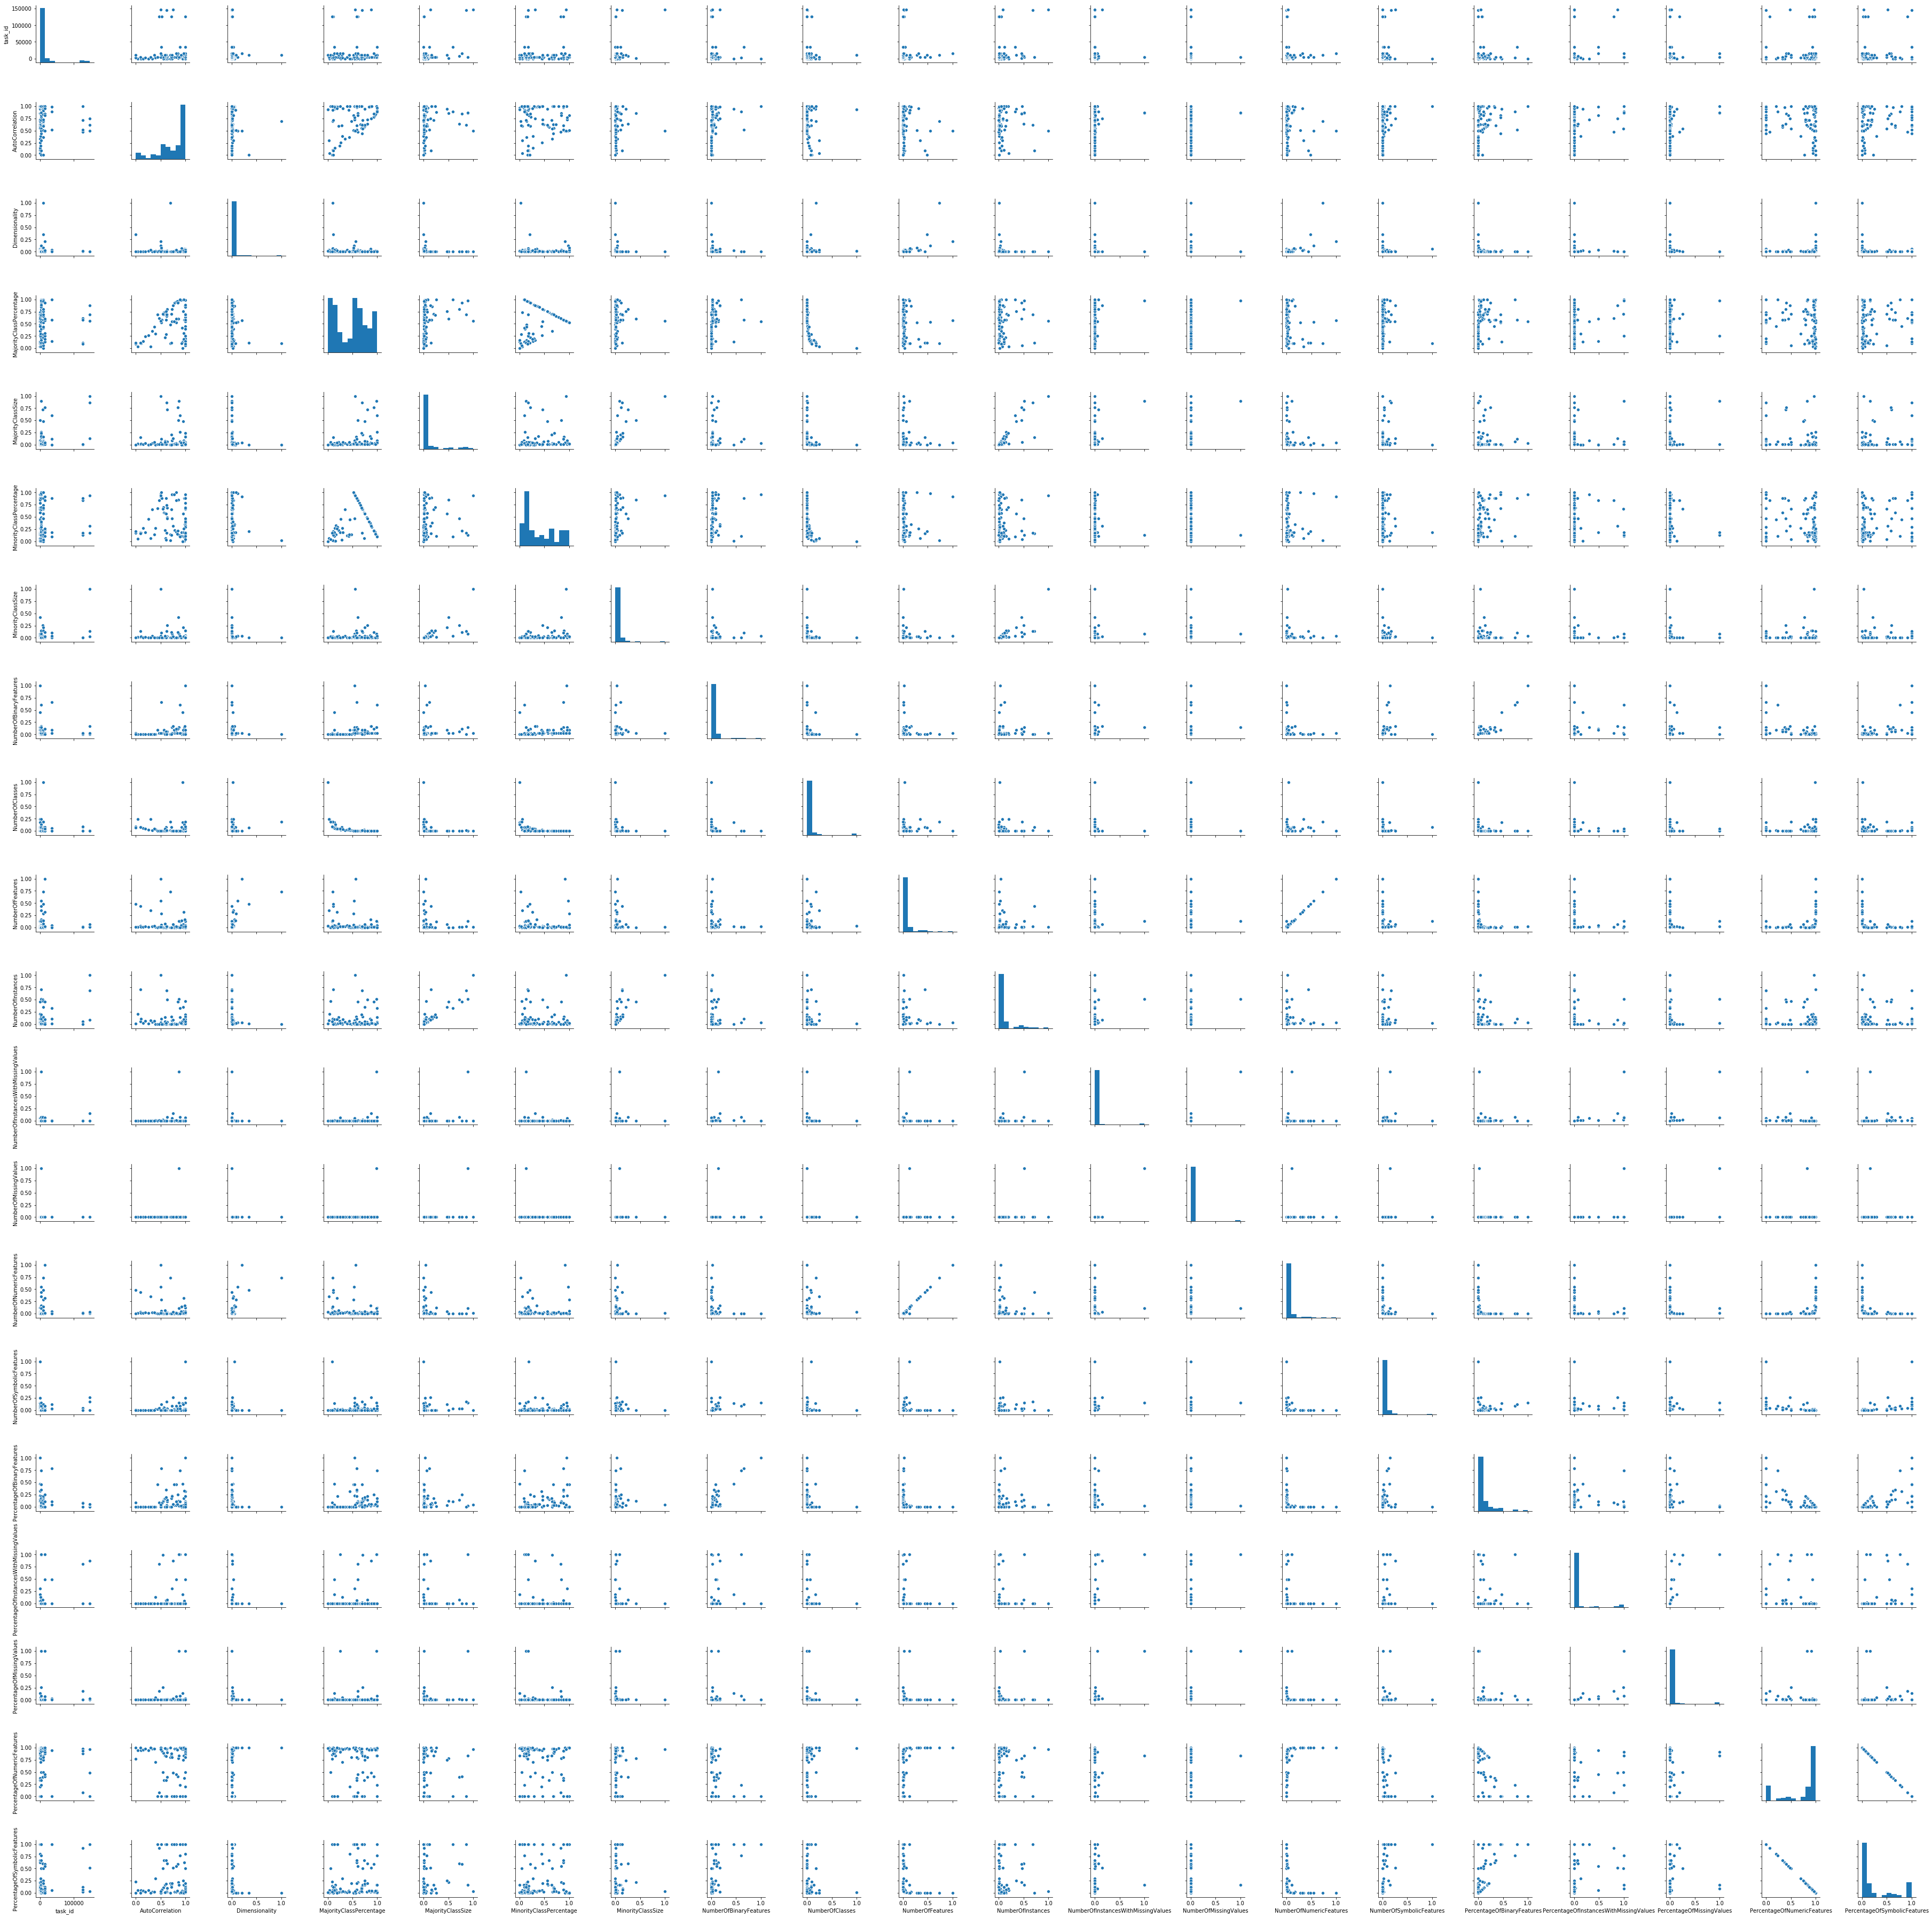

In [28]:
import seaborn as sns

sns.pairplot(df);

In [7]:
df.columns

Index(['task_id', 'AutoCorrelation', 'Dimensionality',
       'MajorityClassPercentage', 'MajorityClassSize',
       'MinorityClassPercentage', 'MinorityClassSize',
       'NumberOfBinaryFeatures', 'NumberOfClasses', 'NumberOfFeatures',
       'NumberOfInstances', 'NumberOfInstancesWithMissingValues',
       'NumberOfMissingValues', 'NumberOfNumericFeatures',
       'NumberOfSymbolicFeatures', 'PercentageOfBinaryFeatures',
       'PercentageOfInstancesWithMissingValues', 'PercentageOfMissingValues',
       'PercentageOfNumericFeatures', 'PercentageOfSymbolicFeatures'],
      dtype='object')

### KMeans Clustering

(3, 19)
(99,)
(99,)


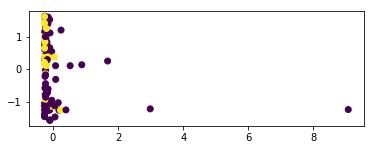

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
# soon: Yeo-Johnson


#X, y = make_blobs(centers=4, random_state=1)
X_df = df[[ 'AutoCorrelation', 'Dimensionality',
       'MajorityClassPercentage', 'MajorityClassSize',
       'MinorityClassPercentage', 'MinorityClassSize',
       'NumberOfBinaryFeatures', 'NumberOfClasses', 'NumberOfFeatures',
       'NumberOfInstances', 'NumberOfInstancesWithMissingValues',
       'NumberOfMissingValues', 'NumberOfNumericFeatures',
       'NumberOfSymbolicFeatures', 'PercentageOfBinaryFeatures',
       'PercentageOfInstancesWithMissingValues', 'PercentageOfMissingValues',
       'PercentageOfNumericFeatures', 'PercentageOfSymbolicFeatures']]
minmax = MinMaxScaler(feature_range=(0,1))
standard_sc = StandardScaler()
X = X_df.values

X = standard_sc.fit_transform(X)
X_sc = X
#X_pt = pt.fit(X_sc)

km = KMeans(n_clusters=3, random_state=0)
km.fit(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km.predict(X).shape)
plt.scatter(X[:, 1], X[:, 2], c=km.labels_)
plt.gca().set_aspect("equal")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aab30b93780>,
      dtype=object)

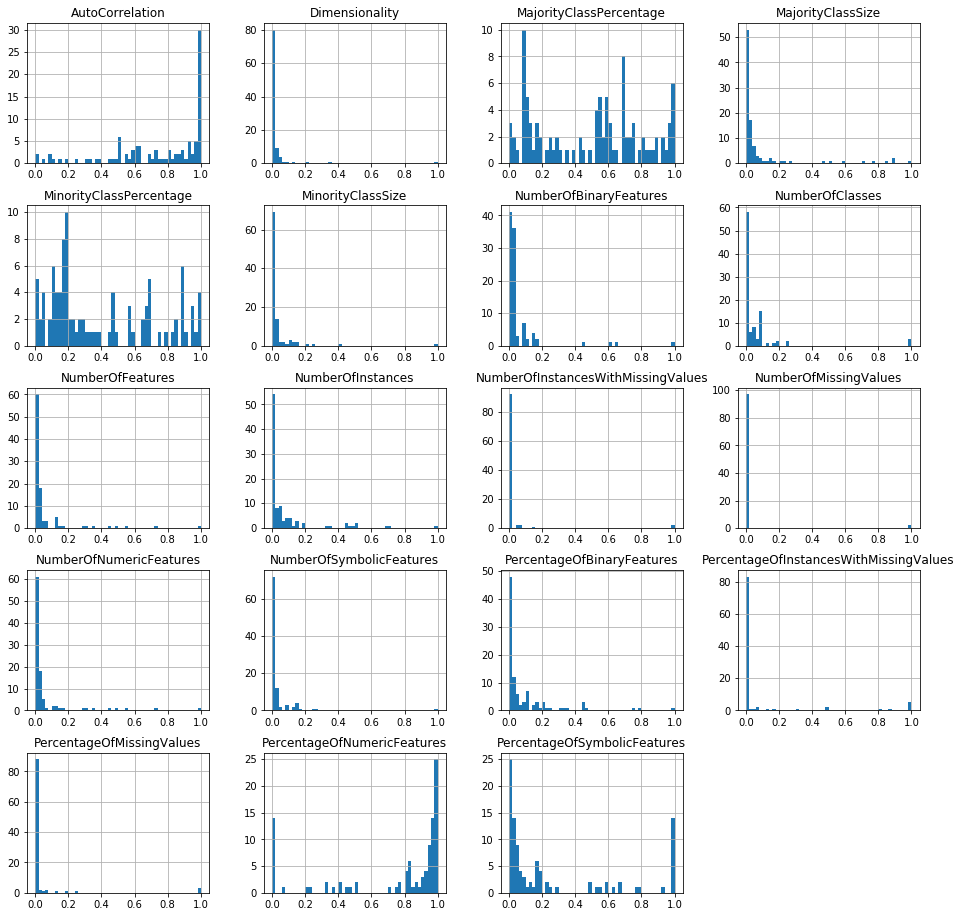

In [34]:
X_df.hist(bins=50, figsize=(16,16))

In [35]:
X_pt_unsc = pt.fit_transform(X_df)

In [39]:
X_pt_unsc = pd.DataFrame(X_pt_unsc, columns=X_df.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aab2e5fd710>,
      dtype=object)

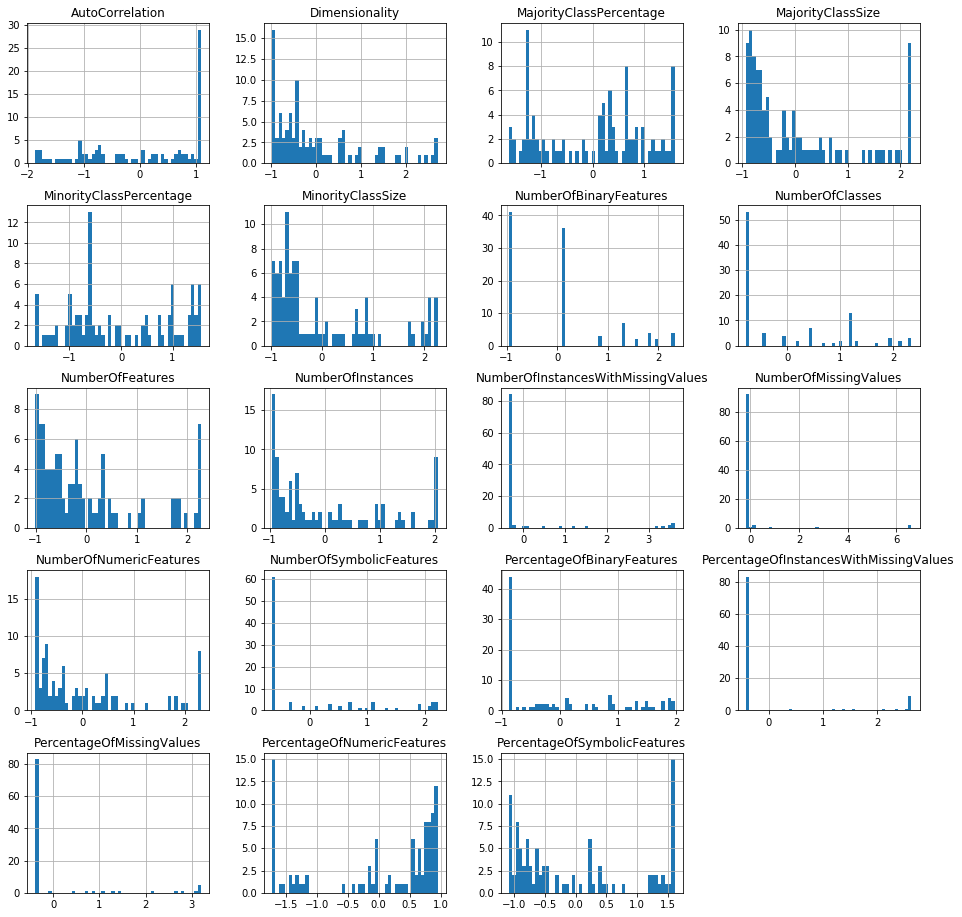

In [41]:
X_pt_unsc.hist(bins=50, figsize=(16,16))

In [9]:
X_pt = pt.fit_transform(X_sc)

(2, 19)
(99,)
(99,)


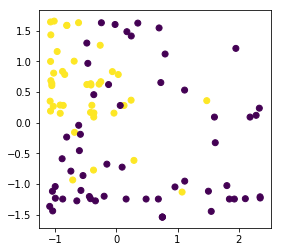

In [45]:
km = KMeans(n_clusters=2, random_state=0)
km.fit(X_pt_unsc)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km.predict(X_pt).shape)
plt.scatter(X_pt[:, 1], X_pt[:, 2], c=km.labels_)
plt.gca().set_aspect("equal")

In [49]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.5).fit(X_sc)
pred_ee = ee.predict(X_sc)
print(pred_ee)
print("Predicted proportion of outliers in the data using Elliptic Envelope: ", np.mean(pred_ee == -1))

/rigel/home/aaj2146/.conda/envs/myenv2/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:646: UserWarning:

The covariance matrix associated to your dataset is not full rank



[-1 -1  1  1  1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1
  1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1
  1 -1  1  1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1
 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1
 -1 -1 -1]
Predicted proportion of outliers in the data using Elliptic Envelope:  0.5050505050505051


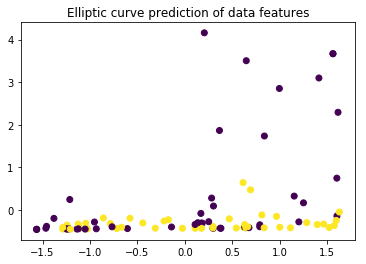

In [50]:
plt.title("Elliptic curve prediction of data features")
plt.scatter(X_sc[:, 2], X_sc[:, 3], c=pred_ee)

In [51]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.5).fit(X_pt_unsc)
pred_ee = ee.predict(X_pt_unsc)
print(pred_ee)
print("Predicted proportion of outliers in the data using Elliptic Envelope: ", np.mean(pred_ee == -1))

/rigel/home/aaj2146/.conda/envs/myenv2/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning:

Determinant has increased; this should not happen: log(det) > log(previous_det) (-114.127055374447906 > -502.194012797200287). You may want to try with a higher value of support_fraction (current value: 0.606).

/rigel/home/aaj2146/.conda/envs/myenv2/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning:

Determinant has increased; this should not happen: log(det) > log(previous_det) (-181.816501335293651 > -498.651951656425467). You may want to try with a higher value of support_fraction (current value: 0.606).



[-1 -1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1
 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1
 -1  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1]
Predicted proportion of outliers in the data using Elliptic Envelope:  0.494949494949495


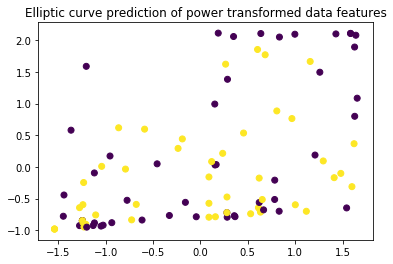

In [52]:
plt.title("Elliptic curve prediction of power transformed data features")
plt.scatter(X_pt[:, 2], X_pt[:, 3], c=pred_ee)

In [53]:
# Use Power Transformer
# Check if the clusters 

In [54]:
# Getting PCA version of the data

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#print(cancer.data.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sc)
X_pca_pt = pca.fit_transform(X_pt)

(2, 2)
(99,)
(99,)


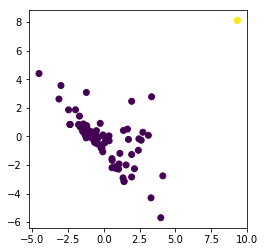

In [59]:
#PCA K-means
km = KMeans(n_clusters=2, random_state=0)
km.fit(X_pca)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km.predict(X_pca).shape)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_)
plt.gca().set_aspect("equal")

In [ ]:
X_pca[X_pca]

In [78]:
df.loc[53:54]

,task_id,AutoCorrelation,Dimensionality,MajorityClassPercentage,MajorityClassSize,MinorityClassPercentage,MinorityClassSize,NumberOfBinaryFeatures,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,PercentageOfBinaryFeatures,PercentageOfInstancesWithMissingValues,PercentageOfMissingValues,PercentageOfNumericFeatures,PercentageOfSymbolicFeatures
53,3946.0,0.863923,0.001989,0.979165,0.893864,0.130568,0.079321,0.142857,0.0,0.128032,0.507432,1.0,1.0,0.108108,0.158333,0.022882,1.0,0.998333,0.831637,0.168363
54,3948.0,0.864183,0.001989,0.978951,0.893671,0.130976,0.079538,0.142857,0.0,0.128032,0.507432,1.0,1.0,0.108108,0.158333,0.022882,1.0,0.998333,0.831637,0.168363


In [83]:
df[df.NumberOfMissingValues > 0]

,task_id,AutoCorrelation,Dimensionality,MajorityClassPercentage,MajorityClassSize,MinorityClassPercentage,MinorityClassSize,NumberOfBinaryFeatures,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,PercentageOfBinaryFeatures,PercentageOfInstancesWithMissingValues,PercentageOfMissingValues,PercentageOfNumericFeatures,PercentageOfSymbolicFeatures
5,15.0,0.631838,0.006241,0.689293,0.008531,0.683621,0.005085,0.028571,0.000000,0.003384,0.002040,0.00032,0.000002,0.005068,0.000000,0.105714,0.022890,0.003289,0.900507,0.099493
12,24.0,0.726371,0.001204,0.542668,0.080909,0.963370,0.084601,0.142857,0.000000,0.010716,0.078155,0.04960,0.000309,0.000000,0.091667,0.229814,0.305268,0.019073,0.000000,1.000000
14,29.0,0.978281,0.010139,0.582303,0.007083,0.887749,0.006513,0.142857,0.000000,0.006768,0.001948,0.00074,0.000008,0.003378,0.037500,0.330357,0.053623,0.008721,0.375211,0.624789
19,41.0,0.945798,0.023096,0.133217,0.001467,0.004754,0.000043,0.457143,0.173469,0.018049,0.001876,0.00242,0.000291,0.000000,0.145833,0.469841,0.177160,0.136582,0.000000,1.000000
27,2079.0,0.393218,0.011889,0.299938,0.003822,0.271661,0.002142,0.000000,0.030612,0.009024,0.002419,0.00190,0.000056,0.007883,0.020833,0.000000,0.129076,0.043735,0.700394,0.299606
28,3021.0,0.886549,0.003452,0.992197,0.068036,0.105703,0.004868,0.600000,0.000000,0.014664,0.033542,0.07544,0.000756,0.003941,0.091667,0.740000,1.000000,0.077006,0.233465,0.766535
37,3543.0,0.609250,0.005229,0.583294,0.005057,0.885859,0.004674,0.057143,0.000000,0.001128,0.000000,0.00064,0.000004,0.001126,0.012500,0.352381,0.064000,0.015328,0.333521,0.666479
40,3561.0,0.545483,0.006493,0.701520,0.008338,0.660293,0.004717,0.028571,0.000000,0.003384,0.001763,0.01332,0.000150,0.002815,0.016667,0.105714,0.991071,0.256608,0.500282,0.499718
49,3904.0,0.999869,0.000849,0.850928,0.169134,0.375233,0.045438,0.028571,0.000000,0.010152,0.106458,0.00010,0.000003,0.011824,0.000000,0.048052,0.000459,0.000150,0.955083,0.044917
53,3946.0,0.863923,0.001989,0.979165,0.893864,0.130568,0.079321,0.142857,0.000000,0.128032,0.507432,1.00000,1.000000,0.108108,0.158333,0.022882,1.000000,0.998333,0.831637,0.168363


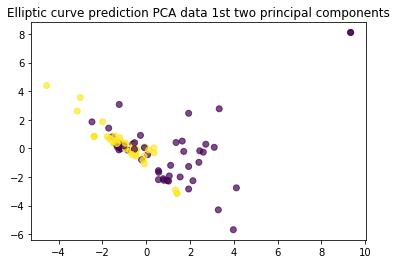

In [55]:
plt.title("Elliptic curve prediction PCA data 1st two principal components")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_ee, alpha = 0.7)

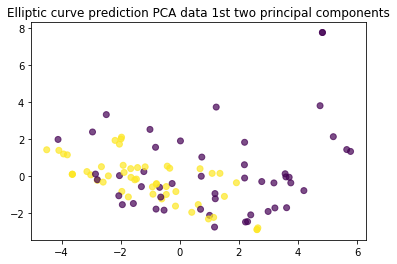

In [56]:
plt.title("Elliptic curve prediction PCA data 1st two principal components")
plt.scatter(X_pca_pt[:, 0], X_pca_pt[:, 1], c=pred_ee, alpha = 0.7)

In [19]:
from sklearn.manifold import TSNE
#from sklearn.datasets import load_digits
#digits = load_digits()
#X = digits.data / 16.
X_tsne = TSNE().fit_transform(X_sc)
X_tsne_pt = TSNE().fit_transform(X_pt)

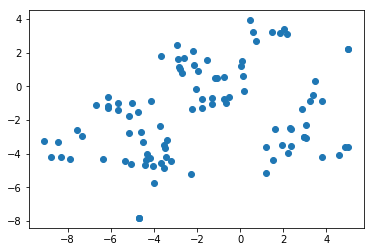

In [20]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

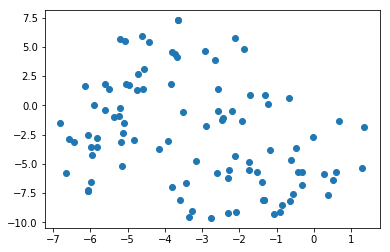

In [21]:
plt.scatter(X_tsne_pt[:, 0], X_tsne_pt[:, 1])

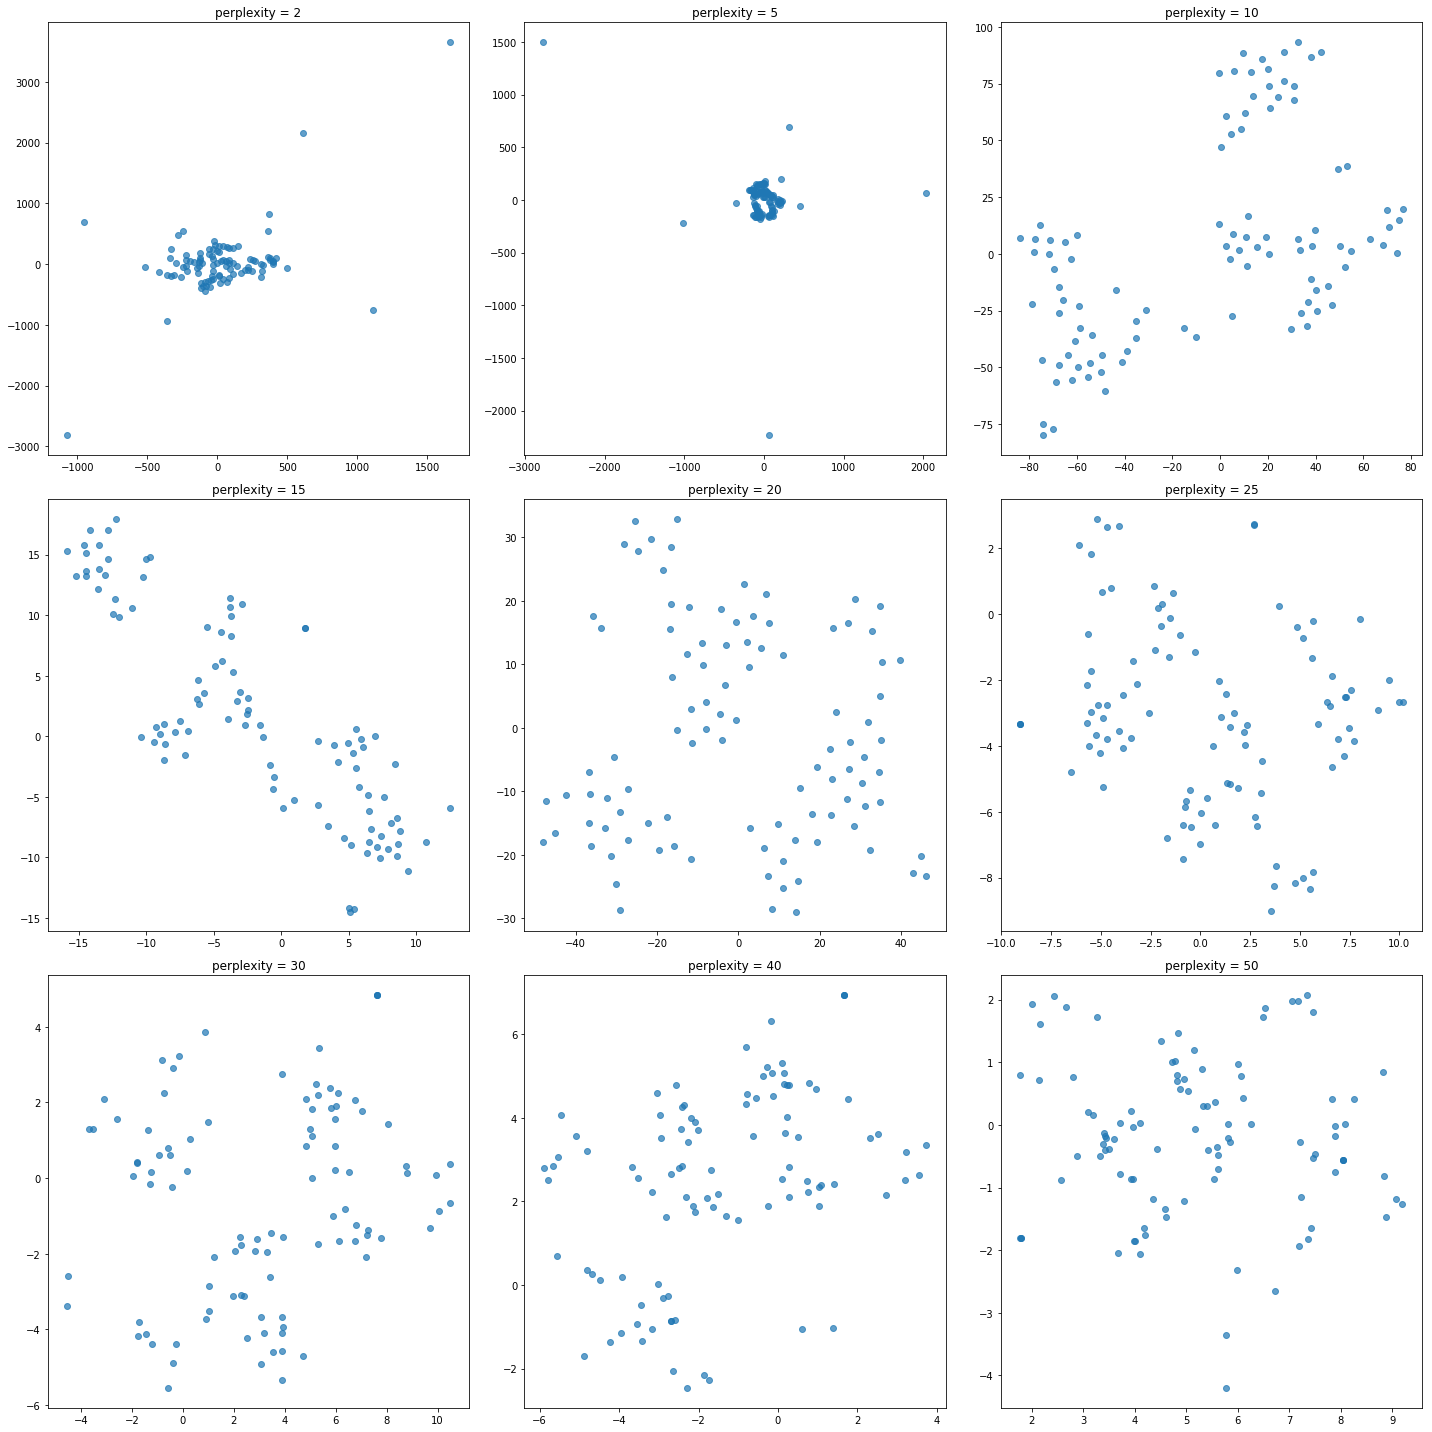

In [89]:
perplexity = [2,5,10,15,20,25,30,40,50]
p = 0
fig,ax = plt.subplots(3,3, figsize=(20,20))
for i in range(3):
    for j in range(3):
        all_data_sc_tsne = TSNE(perplexity=perplexity[p]).fit_transform(X_sc)
        #print(p)
        ax[i,j].scatter(all_data_sc_tsne[:, 0], all_data_sc_tsne[:, 1],alpha = 0.7)
        ax[i,j].set_title('perplexity = '+str(perplexity[p]))
        p+=1
plt.tight_layout()
plt.show()

In [102]:
X_tsne_10 = TSNE(perplexity=15).fit_transform(X_sc)
X_tsne_15 = TSNE(perplexity=15).fit_transform(X_sc)


X_tsne_20 = TSNE(perplexity=20).fit_transform(X_sc)
X_tsne_25 = TSNE(perplexity=25).fit_transform(X_sc)
X_tsne_30 = TSNE(perplexity=30).fit_transform(X_sc)
#X_tsne_pt = TSNE().fit_transform(X_pt)

(3, 2)
(99,)
(99,)


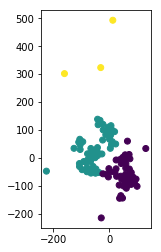

In [104]:

km10 = KMeans(n_clusters=3, random_state=0)
km10.fit(X_tsne_10)
print(km10.cluster_centers_.shape)
print(km10.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km10.predict(X_tsne_10).shape)
plt.scatter(X_tsne_10[:, 0], X_tsne_10[:, 1], c=km10.labels_)
plt.gca().set_aspect("equal")

(3, 2)
(99,)
(99,)


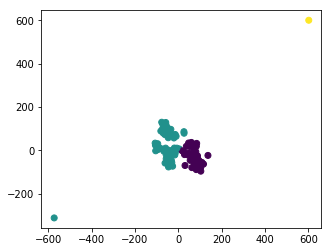

In [87]:

km = KMeans(n_clusters=3, random_state=0)
km.fit(X_tsne_15)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km.predict(X_tsne_15).shape)
plt.scatter(X_tsne_15[:, 0], X_tsne_15[:, 1], c=km.labels_)
plt.gca().set_aspect("equal")

(3, 2)
(99,)
(99,)


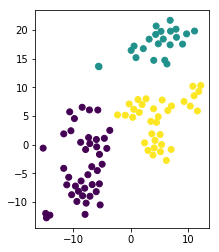

In [105]:

km20 = KMeans(n_clusters=3, random_state=0)
km20.fit(X_tsne_20)
print(km20.cluster_centers_.shape)
print(km20.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km20.predict(X_tsne_20).shape)
plt.scatter(X_tsne_20[:, 0], X_tsne_20[:, 1], c=km20.labels_)
plt.gca().set_aspect("equal")

(3, 2)
(99,)
(99,)


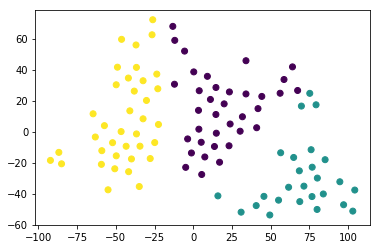

In [106]:

km25 = KMeans(n_clusters=3, random_state=0)
km25.fit(X_tsne_25)
print(km25.cluster_centers_.shape)
print(km25.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km25.predict(X_tsne_25).shape)
plt.scatter(X_tsne_25[:, 0], X_tsne_25[:, 1], c=km25.labels_)
plt.gca().set_aspect("equal")

(3, 2)
(99,)
(99,)


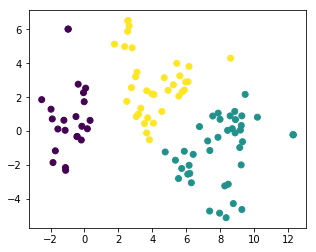

In [107]:

km30 = KMeans(n_clusters=3, random_state=0)
km30.fit(X_tsne_30)
print(km30.cluster_centers_.shape)
print(km30.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km30.predict(X_tsne_30).shape)
plt.scatter(X_tsne_30[:, 0], X_tsne_30[:, 1], c=km30.labels_)
plt.gca().set_aspect("equal")

In [108]:
km20.labels_

array([1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1,
       1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0,
       0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1], dtype=int32)

In [122]:
clus20_1 = df[km20.labels_ == 0].task_id

df[km20.labels_ == 0]


,task_id,AutoCorrelation,Dimensionality,MajorityClassPercentage,MajorityClassSize,MinorityClassPercentage,MinorityClassSize,NumberOfBinaryFeatures,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,PercentageOfBinaryFeatures,PercentageOfInstancesWithMissingValues,PercentageOfMissingValues,PercentageOfNumericFeatures,PercentageOfSymbolicFeatures
1,6.0,0.040904,0.000335,0.032744,0.015383,0.055683,0.015752,0.000000,0.244898,0.007332,0.199897,0.00000,0.000000,0.009009,0.000000,0.000000,0.000000,0.000000,0.941706,0.058294
2,11.0,0.697152,0.003473,0.481591,0.005250,0.140678,0.000930,0.000000,0.010204,0.000564,0.001281,0.00000,0.000000,0.002252,0.000000,0.000000,0.000000,0.000000,0.800450,0.199550
3,12.0,0.995550,0.047583,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.120135,0.015377,0.00000,0.000000,0.121622,0.000000,0.000000,0.000000,0.000000,0.995952,0.004048
4,14.0,0.995550,0.016860,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.041173,0.015377,0.00000,0.000000,0.042793,0.000000,0.000000,0.000000,0.000000,0.987569,0.012431
6,16.0,0.995550,0.014226,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.034405,0.015377,0.00000,0.000000,0.036036,0.000000,0.000000,0.000000,0.000000,0.985170,0.014830
7,18.0,0.995550,0.001498,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.001692,0.015377,0.00000,0.000000,0.003378,0.000000,0.000000,0.000000,0.000000,0.857625,0.142375
10,22.0,0.995550,0.010495,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.024817,0.015377,0.00000,0.000000,0.026464,0.000000,0.000000,0.000000,0.000000,0.979718,0.020282
13,28.0,0.092548,0.005038,0.098048,0.010731,0.181802,0.011857,0.000000,0.081633,0.034405,0.052486,0.00000,0.000000,0.036036,0.000000,0.000000,0.000000,0.000000,0.985170,0.014830
16,32.0,0.102908,0.000640,0.100501,0.021771,0.176508,0.022697,0.000000,0.081633,0.007332,0.107555,0.00000,0.000000,0.009009,0.000000,0.000000,0.000000,0.000000,0.941706,0.058294
17,36.0,0.148124,0.003762,0.141932,0.006060,0.272057,0.007010,0.000000,0.051020,0.009024,0.018555,0.00000,0.000000,0.010698,0.000000,0.000000,0.000000,0.000000,0.950535,0.049465


In [146]:
df[km20.labels_ == 1]

,task_id,AutoCorrelation,Dimensionality,MajorityClassPercentage,MajorityClassSize,MinorityClassPercentage,MinorityClassSize,NumberOfBinaryFeatures,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,PercentageOfBinaryFeatures,PercentageOfInstancesWithMissingValues,PercentageOfMissingValues,PercentageOfNumericFeatures,PercentageOfSymbolicFeatures
0,3.0,0.999114,0.005043,0.547202,0.031904,0.954720,0.032910,1.000000,0.000000,0.018613,0.027637,0.00000,0.000000,0.000000,0.150000,1.000000,0.000000,0.000000,0.000000,1.000000
8,20.0,0.995550,0.052850,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.133672,0.015377,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
9,21.0,0.599337,0.001740,0.737377,0.023045,0.057549,0.001277,0.000000,0.020408,0.001692,0.012588,0.00000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000
11,23.0,0.996656,0.002941,0.445504,0.011831,0.441663,0.007075,0.085714,0.010204,0.003384,0.009974,0.00000,0.000000,0.001126,0.029167,0.317143,0.000000,0.000000,0.200113,0.799887
12,24.0,0.726371,0.001204,0.542668,0.080909,0.963370,0.084601,0.142857,0.000000,0.010716,0.078155,0.04960,0.000309,0.000000,0.091667,0.229814,0.305268,0.019073,0.000000,1.000000
14,29.0,0.978281,0.010139,0.582303,0.007083,0.887749,0.006513,0.142857,0.000000,0.006768,0.001948,0.00074,0.000008,0.003378,0.037500,0.330357,0.053623,0.008721,0.375211,0.624789
15,31.0,0.569600,0.009179,0.737130,0.013202,0.592352,0.006361,0.085714,0.000000,0.009588,0.005126,0.00000,0.000000,0.003941,0.054167,0.151020,0.000000,0.000000,0.333521,0.666479
19,41.0,0.945798,0.023096,0.133217,0.001467,0.004754,0.000043,0.457143,0.173469,0.018049,0.001876,0.00242,0.000291,0.000000,0.145833,0.469841,0.177160,0.136582,0.000000,1.000000
21,45.0,0.999425,0.008492,0.543562,0.031634,0.470952,0.016466,0.000000,0.010204,0.032713,0.027576,0.00000,0.000000,0.000000,0.254167,0.000000,0.000000,0.000000,0.000000,1.000000
22,49.0,0.999008,0.004543,0.687394,0.011774,0.687243,0.007054,0.028571,0.000000,0.003384,0.004695,0.00000,0.000000,0.000000,0.037500,0.105714,0.000000,0.000000,0.000000,1.000000


In [147]:
df[km20.labels_ == 2]

,task_id,AutoCorrelation,Dimensionality,MajorityClassPercentage,MajorityClassSize,MinorityClassPercentage,MinorityClassSize,NumberOfBinaryFeatures,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,PercentageOfBinaryFeatures,PercentageOfInstancesWithMissingValues,PercentageOfMissingValues,PercentageOfNumericFeatures,PercentageOfSymbolicFeatures
5,15.0,0.631838,0.006241,0.689293,0.008531,0.683621,0.005085,0.028571,0.000000,0.003384,0.002040,0.00032,0.000002,0.005068,0.000000,0.105714,0.022890,0.003289,0.900507,0.099493
18,37.0,0.550224,0.005105,0.684827,0.009342,0.692141,0.005669,0.028571,0.000000,0.002820,0.002747,0.00000,0.000000,0.004505,0.000000,0.117460,0.000000,0.000000,0.889389,0.110611
20,43.0,0.999835,0.005495,0.636661,0.053502,0.784038,0.039098,0.028571,0.000000,0.030457,0.042040,0.00000,0.000000,0.032095,0.000000,0.018227,0.000000,0.000000,0.983312,0.016688
25,219.0,0.853348,0.000049,0.604077,0.502963,0.846205,0.416102,0.028571,0.000000,0.002820,0.459375,0.00000,0.000000,0.003941,0.004167,0.117460,0.000000,0.000000,0.778216,0.221784
31,3485.0,0.984674,0.054666,0.866329,0.037830,0.345849,0.009196,0.171429,0.000000,0.166949,0.019549,0.00000,0.000000,0.165541,0.020833,0.021143,0.000000,0.000000,0.980552,0.019448
43,3889.0,0.884999,0.006578,0.991868,0.260427,0.106332,0.019041,0.028571,0.000000,0.120135,0.142440,0.00000,0.000000,0.121622,0.000000,0.004872,0.000000,0.000000,0.995952,0.004048
45,3896.0,0.626431,0.004676,0.792535,0.065893,0.486642,0.024363,0.028571,0.000000,0.025381,0.041640,0.00000,0.000000,0.027027,0.000000,0.021574,0.000000,0.000000,0.980143,0.019857
46,3899.0,0.713110,0.000131,0.706582,0.201135,0.650634,0.110392,0.028571,0.000000,0.001128,0.154229,0.00000,0.000000,0.002815,0.000000,0.176190,0.000000,0.000000,0.833803,0.166197
47,3902.0,0.780412,0.011401,0.927197,0.024396,0.229718,0.003722,0.028571,0.000000,0.019177,0.009821,0.00000,0.000000,0.020833,0.000000,0.027820,0.000000,0.000000,0.974232,0.025768
48,3903.0,0.814383,0.010633,0.948262,0.026770,0.189529,0.003332,0.028571,0.000000,0.019177,0.010897,0.00000,0.000000,0.020833,0.000000,0.027820,0.000000,0.000000,0.974232,0.025768


In [123]:
clus25_1 = df[km25.labels_ == 2].task_id

df[km25.labels_ == 2]

,task_id,AutoCorrelation,Dimensionality,MajorityClassPercentage,MajorityClassSize,MinorityClassPercentage,MinorityClassSize,NumberOfBinaryFeatures,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,PercentageOfBinaryFeatures,PercentageOfInstancesWithMissingValues,PercentageOfMissingValues,PercentageOfNumericFeatures,PercentageOfSymbolicFeatures
1,6.0,0.040904,0.000335,0.032744,0.015383,0.055683,0.015752,0.000000,0.244898,0.007332,0.199897,0.00000,0.000000,0.009009,0.000000,0.000000,0.000000,0.000000,0.941706,0.058294
2,11.0,0.697152,0.003473,0.481591,0.005250,0.140678,0.000930,0.000000,0.010204,0.000564,0.001281,0.00000,0.000000,0.002252,0.000000,0.000000,0.000000,0.000000,0.800450,0.199550
3,12.0,0.995550,0.047583,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.120135,0.015377,0.00000,0.000000,0.121622,0.000000,0.000000,0.000000,0.000000,0.995952,0.004048
4,14.0,0.995550,0.016860,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.041173,0.015377,0.00000,0.000000,0.042793,0.000000,0.000000,0.000000,0.000000,0.987569,0.012431
6,16.0,0.995550,0.014226,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.034405,0.015377,0.00000,0.000000,0.036036,0.000000,0.000000,0.000000,0.000000,0.985170,0.014830
7,18.0,0.995550,0.001498,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.001692,0.015377,0.00000,0.000000,0.003378,0.000000,0.000000,0.000000,0.000000,0.857625,0.142375
10,22.0,0.995550,0.010495,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.024817,0.015377,0.00000,0.000000,0.026464,0.000000,0.000000,0.000000,0.000000,0.979718,0.020282
13,28.0,0.092548,0.005038,0.098048,0.010731,0.181802,0.011857,0.000000,0.081633,0.034405,0.052486,0.00000,0.000000,0.036036,0.000000,0.000000,0.000000,0.000000,0.985170,0.014830
16,32.0,0.102908,0.000640,0.100501,0.021771,0.176508,0.022697,0.000000,0.081633,0.007332,0.107555,0.00000,0.000000,0.009009,0.000000,0.000000,0.000000,0.000000,0.941706,0.058294
17,36.0,0.148124,0.003762,0.141932,0.006060,0.272057,0.007010,0.000000,0.051020,0.009024,0.018555,0.00000,0.000000,0.010698,0.000000,0.000000,0.000000,0.000000,0.950535,0.049465


In [124]:
clus30_1 = df[km30.labels_ == 1].task_id

df[km30.labels_ == 1]

,task_id,AutoCorrelation,Dimensionality,MajorityClassPercentage,MajorityClassSize,MinorityClassPercentage,MinorityClassSize,NumberOfBinaryFeatures,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,PercentageOfBinaryFeatures,PercentageOfInstancesWithMissingValues,PercentageOfMissingValues,PercentageOfNumericFeatures,PercentageOfSymbolicFeatures
1,6.0,0.040904,0.000335,0.032744,0.015383,0.055683,0.015752,0.000000,0.244898,0.007332,0.199897,0.00000,0.000000,0.009009,0.000000,0.000000,0.000000,0.000000,0.941706,0.058294
2,11.0,0.697152,0.003473,0.481591,0.005250,0.140678,0.000930,0.000000,0.010204,0.000564,0.001281,0.00000,0.000000,0.002252,0.000000,0.000000,0.000000,0.000000,0.800450,0.199550
3,12.0,0.995550,0.047583,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.120135,0.015377,0.00000,0.000000,0.121622,0.000000,0.000000,0.000000,0.000000,0.995952,0.004048
4,14.0,0.995550,0.016860,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.041173,0.015377,0.00000,0.000000,0.042793,0.000000,0.000000,0.000000,0.000000,0.987569,0.012431
6,16.0,0.995550,0.014226,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.034405,0.015377,0.00000,0.000000,0.036036,0.000000,0.000000,0.000000,0.000000,0.985170,0.014830
7,18.0,0.995550,0.001498,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.001692,0.015377,0.00000,0.000000,0.003378,0.000000,0.000000,0.000000,0.000000,0.857625,0.142375
10,22.0,0.995550,0.010495,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.024817,0.015377,0.00000,0.000000,0.026464,0.000000,0.000000,0.000000,0.000000,0.979718,0.020282
13,28.0,0.092548,0.005038,0.098048,0.010731,0.181802,0.011857,0.000000,0.081633,0.034405,0.052486,0.00000,0.000000,0.036036,0.000000,0.000000,0.000000,0.000000,0.985170,0.014830
16,32.0,0.102908,0.000640,0.100501,0.021771,0.176508,0.022697,0.000000,0.081633,0.007332,0.107555,0.00000,0.000000,0.009009,0.000000,0.000000,0.000000,0.000000,0.941706,0.058294
17,36.0,0.148124,0.003762,0.141932,0.006060,0.272057,0.007010,0.000000,0.051020,0.009024,0.018555,0.00000,0.000000,0.010698,0.000000,0.000000,0.000000,0.000000,0.950535,0.049465


In [128]:
lab20 = km20.labels_
lab25 = km25.labels_
lab30 = km30.labels_



In [130]:
clust_lab = pd.DataFrame()
clust_lab['l20'] = lab20
clust_lab['l25'] = lab25
clust_lab['l30'] = lab30

,l20,l25,l30
0,1,1,0
1,0,2,1
2,0,2,1
3,0,2,1
4,0,2,1


In [141]:
clust_lab['l30'] = clust_lab['l30'].replace(1,'a')
clust_lab['l25'] = clust_lab['l25'].replace(2,'a')
clust_lab['l20'] = clust_lab['l20'].replace(0,'a')


clust_lab['l25'] = clust_lab['l25'].replace(1,'b')
clust_lab['l20'] = clust_lab['l20'].replace(1,'b')


clust_lab['l20'] = clust_lab['l20'].replace(2,'c')
clust_lab['l30'] = clust_lab['l30'].replace(2,'c')

clust_lab['l25'] = clust_lab['l25'].replace(0,'c')
clust_lab['l30'] = clust_lab['l30'].replace(0,'b')

In [142]:
clust_lab

,l20,l25,l30
0,b,b,b
1,a,a,a
2,a,a,a
3,a,a,a
4,a,a,a
5,c,c,c
6,a,a,a
7,a,a,a
8,b,b,b
9,b,b,b


In [145]:
from sklearn.metrics import f1_score
print(f1_score(clust_lab.l20, clust_lab.l25, average='micro'))
print(f1_score(clust_lab.l20, clust_lab.l30, average='micro'))
print(f1_score(clust_lab.l25, clust_lab.l30, average='micro'))

0.9090909090909091
0.98989898989899
0.9090909090909091


In [109]:
km25.labels_

array([1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1,
       1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1], dtype=int32)

In [110]:
km30.labels_

array([0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1,
       1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0], dtype=int32)

#### We can see three clusters (qualitatively)

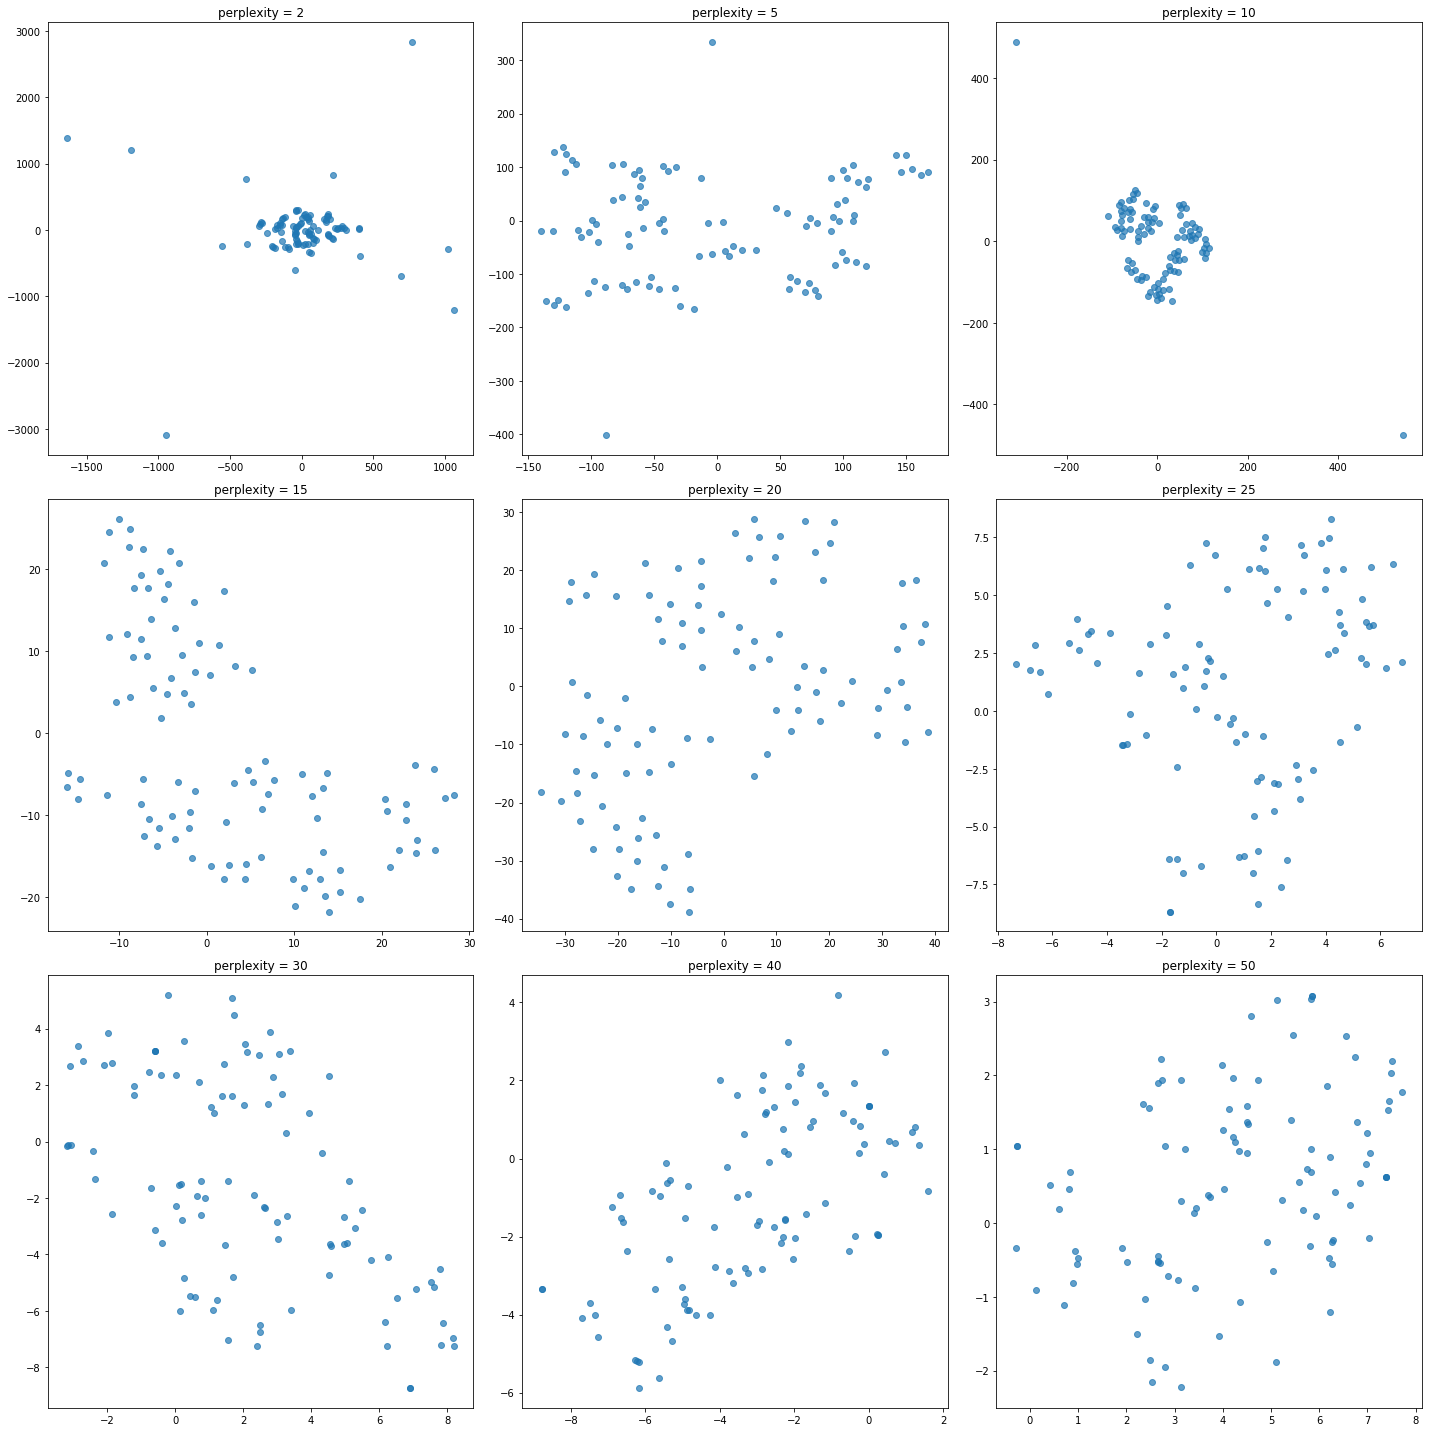

In [23]:
perplexity = [2,5,10,15,20,25,30,40,50]
p = 0
fig,ax = plt.subplots(3,3, figsize=(20,20))
for i in range(3):
    for j in range(3):
        all_data_sc_tsne = TSNE(perplexity=perplexity[p]).fit_transform(X_pt)
        ax[i,j].scatter(all_data_sc_tsne[:, 0], all_data_sc_tsne[:, 1],alpha = 0.7)
        ax[i,j].set_title('perplexity = '+str(perplexity[p]))
        p+=1
plt.tight_layout()
plt.show()

In [24]:
#DBSCAN
import itertools    
from sklearn.cluster import DBSCAN
db_dict = {}
eps = [1,1.5,2,2.5,3]
min_samples = [2,3,4,5,6]
for i in eps:
    for j in min_samples:
        db = DBSCAN(eps=i, min_samples=j).fit(X_sc)
        #print('No. of Noise Points')
        #print('eps = ',i,' and min_samples = ',j,' ',sum(db.labels_ ==-1))
        #print('No. of non noise and non zero class:')
        #print('eps = ',i,' and min_samples = ',j,' ',sum(db.labels_ !=0)-sum(db.labels_ ==-1))
        #print(set(db.labels_))
        db_dict['db'+str(i)+str(j)]=db

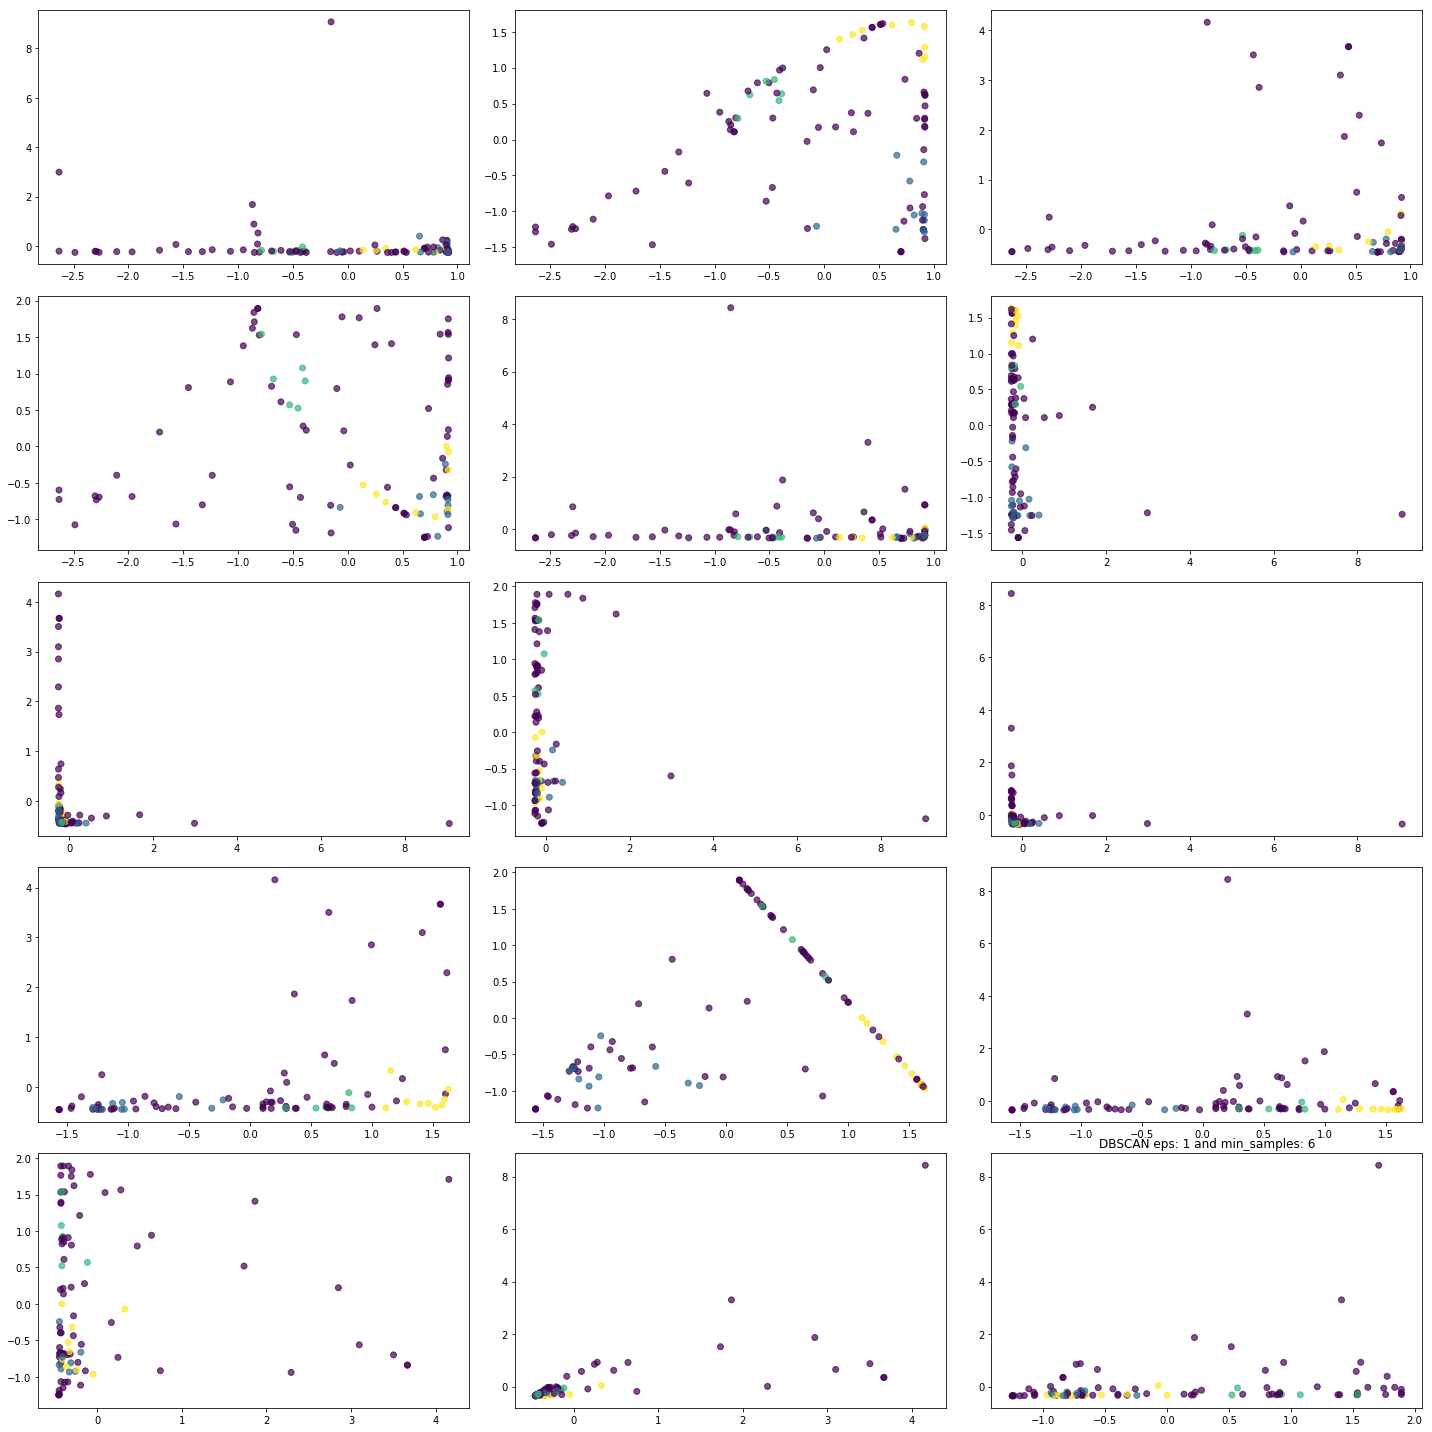

In [25]:
#DBSCAN with eps=1 and min_samples = 6
comb = []
for i in itertools.combinations(range(6), 2):
    comb.append(i)
all_data_scaled = X_sc
p = 0
fig,ax = plt.subplots(5,3, figsize=(20,20))
for i in range(5):
    for j in range(3):
        ax[i,j].scatter(all_data_scaled[:, comb[p][0]], all_data_scaled[:, comb[p][1]],
                        c=db_dict['db16'].labels_,alpha = 0.7)
#        ax[i,j].set_title('perplexity = '+str(perplexity[p]))
        p+=1
plt.tight_layout()
plt.title('DBSCAN eps: 1 and min_samples: 6')
plt.show()


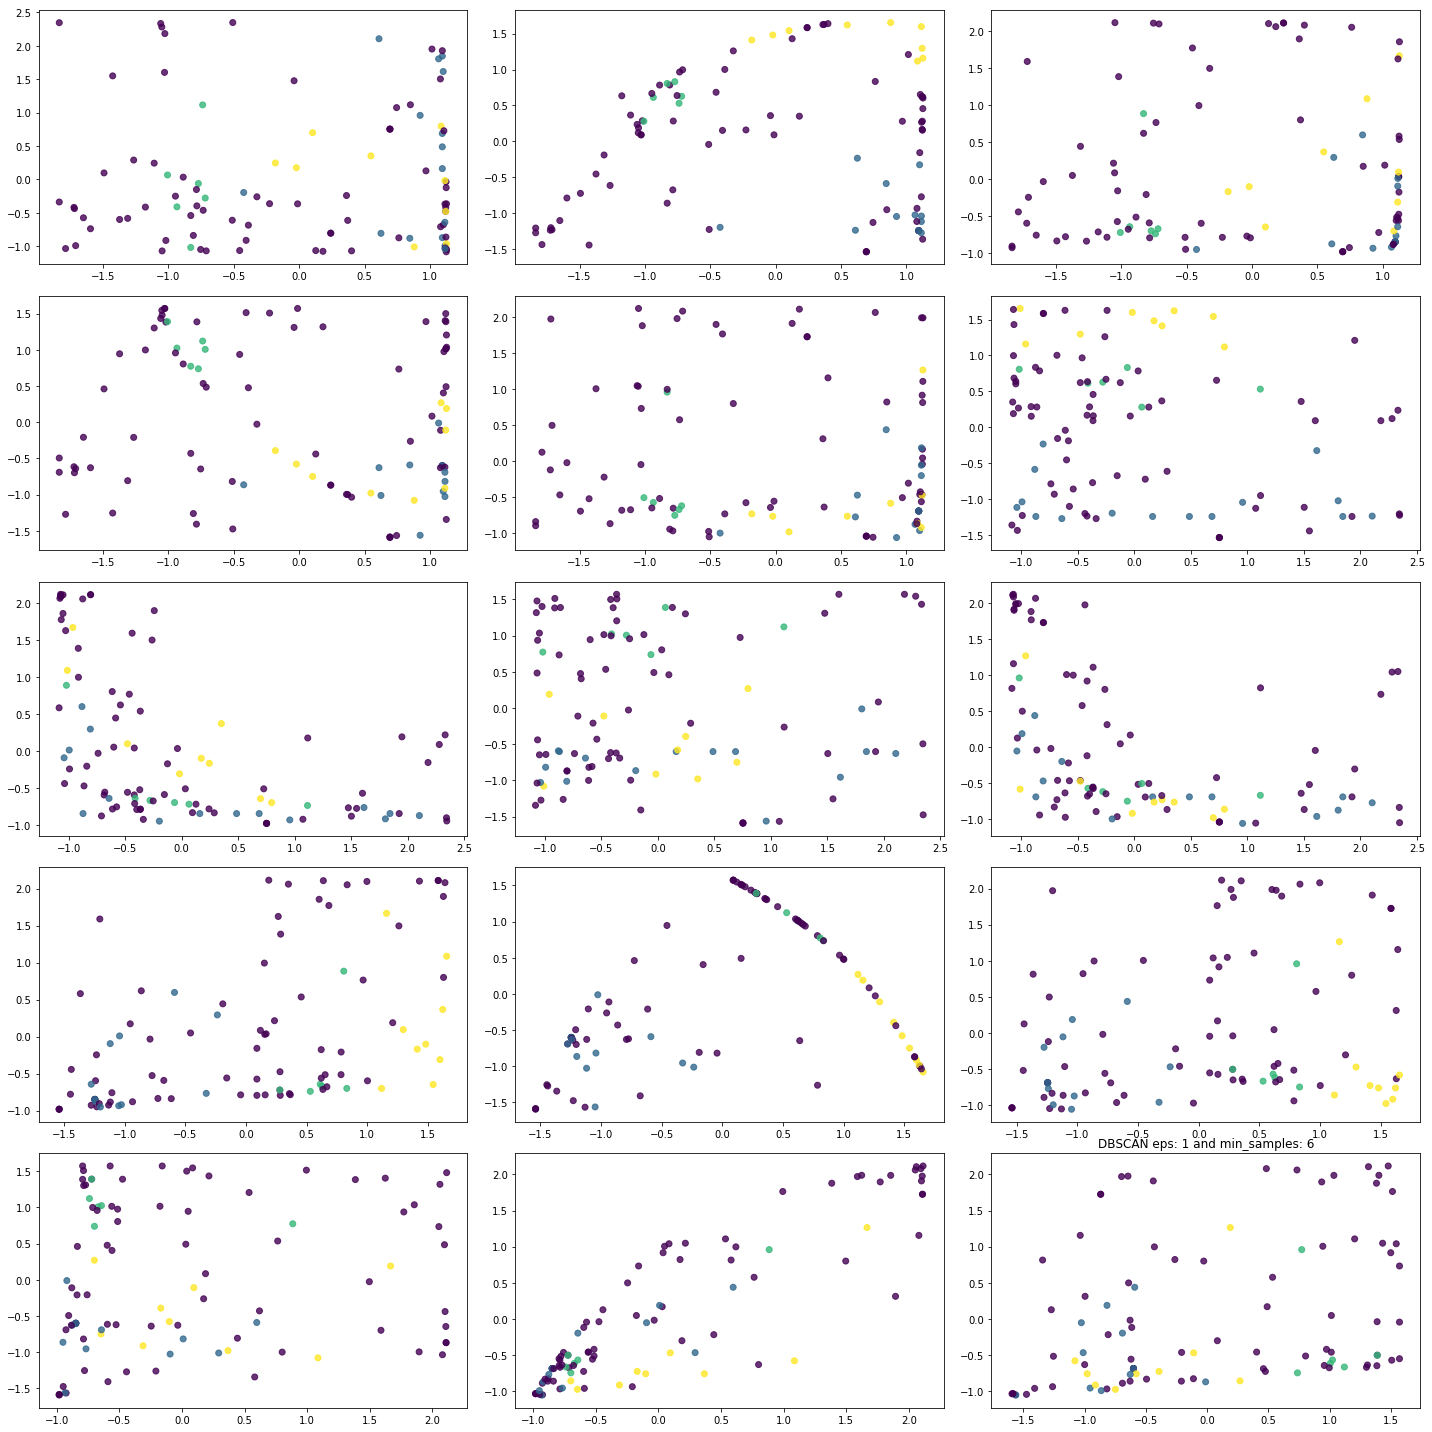

In [26]:
#DBSCAN with eps=1 and min_samples = 6
comb = []
for i in itertools.combinations(range(6), 2):
    comb.append(i)
all_data_scaled = X_pt
p = 0
fig,ax = plt.subplots(5,3, figsize=(20,20))
for i in range(5):
    for j in range(3):
        ax[i,j].scatter(all_data_scaled[:, comb[p][0]], all_data_scaled[:, comb[p][1]],
                        c=db_dict['db16'].labels_,alpha = 0.8)
#        ax[i,j].set_title('perplexity = '+str(perplexity[p]))
        p+=1
plt.tight_layout()
plt.title('DBSCAN eps: 1 and min_samples: 6')
plt.show()
